In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.font_manager as font_manager
path = './Times_New_Roman.ttf'
font_manager.fontManager.addfont(path)

0 SNR rnn ber: 0.17763157894736842 cnn ber: 0.18277138157894735 mlp ber: 0.18290844298245612

5 SNR rnn ber: 0.0995751096491228 cnn ber: 0.11437774122807018 mlp ber: 0.1186951754385965

10 SNR rnn ber: 0.06777686403508772 cnn ber: 0.07819353070175439 mlp ber: 0.0918311403508772

15 SNR rnn ber: rnn ber: 0.05921052631578948 cnn ber: 0.05975877192982456 mlp ber: 0.06928453947368422

In [2]:
import numpy as np
print(np.random.uniform(6.0, 6.5))

6.29509168601801


In [3]:
QLSM_DSCL = np.array([0.1790, 0.1022, 0.071, 0.058046])
LMMSE = np.array([0.328, 0.221, 0.186, 0.110])
print(np.sum(QLSM_DSCL/LMMSE)/4)

0.47939662135738403


/tmp/ipykernel_4141/2266838766.py:29: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set(ylim=(0.0, 0.4))


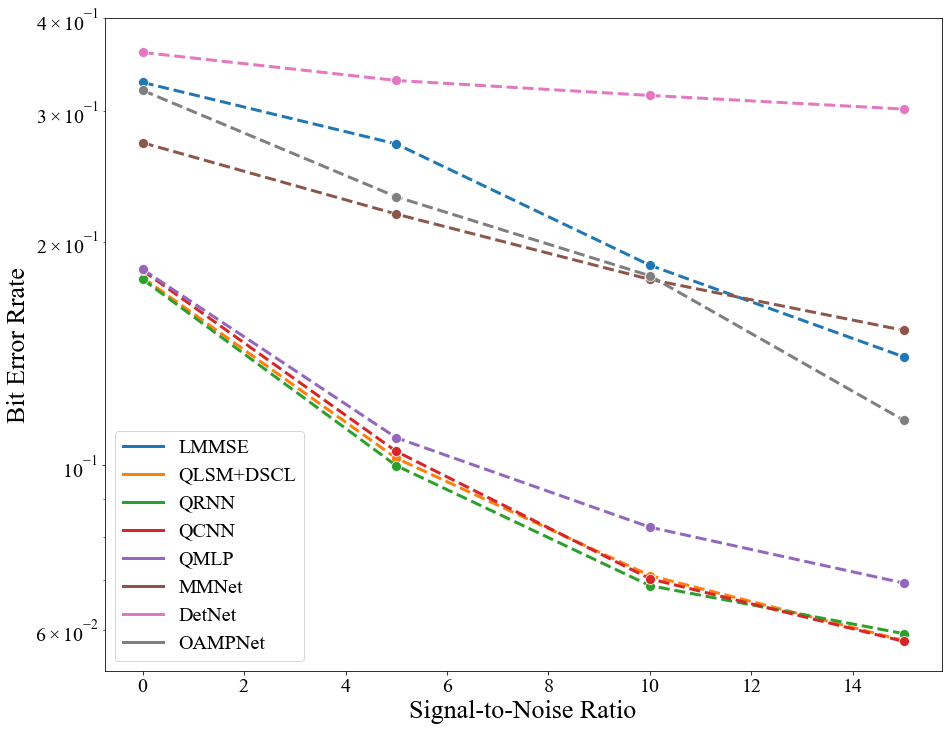

In [5]:
# BER
SNR = [0, 5, 10, 15]
QLSM = [0.18681, 0.1189, 0.0751, 0.0630]
QLSM_DSCL = [0.1790, 0.1022, 0.071, 0.058046]
QRNN = [0.1780, 0.09987, 0.06882, 0.0593]
QCNN = [0.1830, 0.10438, 0.0703, 0.05789]
QMLP = [0.1836, 0.10890, 0.0825, 0.06938]
LMMSE = [0.328, 0.271, 0.186, 0.140]         #LMMSE = [0.328, 0.221, 0.186, 0.110]
MMNet = [0.272, 0.218, 0.178, 0.152]
DetNet = [0.36, 0.33, 0.315, 0.302]
OAMPNet = [0.32, 0.23, 0.18, 0.115]




df = pd.DataFrame(list(zip(SNR, LMMSE, QLSM_DSCL, QRNN, QCNN, QMLP, MMNet, DetNet, OAMPNet)), columns=["SNR", "LMMSE", "QLSM+DSCL", "QRNN", "QCNN", "QMLP", "MMNet", "DetNet", "OAMPNet"])
dfm = df.melt('SNR', var_name='cols', value_name='BER')

plt.figure(figsize=(15,12))
plt.rcParams["font.family"] = "Times New Roman"
ax = sns.lineplot(
    data=dfm,
    x="SNR", y="BER", hue="cols",
    marker="o", dashes=True, linewidth=3, markersize=10, linestyle='--', 
)
ax.set(yscale="log")


ax.set(ylim=(0.0, 0.4))
plt.xlabel('Signal-to-Noise Ratio', fontsize=26)
plt.ylabel('Bit Error Rrate', fontsize=26)
#plt.title('Energy Consumption per Sample for Different Models', fontsize=30, weight='bold')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)
leg = plt.legend(fontsize=20)
for legobj in leg.legendHandles:
    legobj.set_linewidth(3.0)

plt.savefig('BER_all_model.png', bbox_inches='tight')

In [6]:
QLSM_DSCL = np.array([0.1790, 0.1022, 0.071, 0.058046])
QLSM = np.array([0.1852, 0.1086, 0.0751, 0.0630])
print(QLSM_DSCL/QLSM)
print(np.sum(QLSM_DSCL/QLSM)/4)

[0.96652268 0.94106814 0.94540613 0.92136508]
0.943590505670109


/tmp/ipykernel_4141/3593398090.py:20: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set(ylim=(0.0, 0.20))


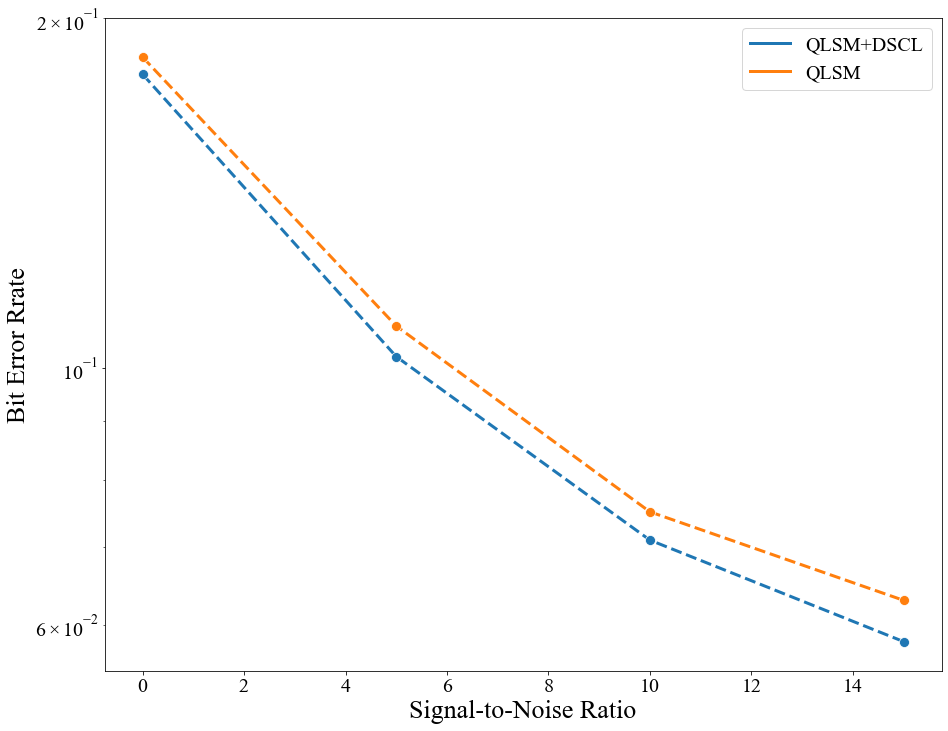

In [7]:
# BER
SNR = [0, 5, 10, 15]
#QLSM_nopath = [0.328, 0.221, 0.186, 0.110]
QLSM = [0.1852, 0.1086, 0.0751, 0.0630]
QLSM_DSCL = [0.1790, 0.1022, 0.071, 0.058046]


df = pd.DataFrame(list(zip(SNR, QLSM_DSCL, QLSM)), columns=["SNR", "QLSM+DSCL", "QLSM"])
dfm = df.melt('SNR', var_name='cols', value_name='BER')

plt.figure(figsize=(15,12))
plt.rcParams["font.family"] = "Times New Roman"
ax = sns.lineplot(
    data=dfm,
    x="SNR", y="BER", hue="cols",
    marker="o", dashes=True, linewidth=3, markersize=10, linestyle='--', 
)
ax.set(yscale="log")
#ax.set(ylim=(0, 0.15))
ax.set(ylim=(0.0, 0.20))
plt.xlabel('Signal-to-Noise Ratio', fontsize=26)
plt.ylabel('Bit Error Rrate', fontsize=26)
#plt.title('Energy Consumption per Sample for Different Models', fontsize=30, weight='bold')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)
leg = plt.legend(fontsize=20)
for legobj in leg.legendHandles:
    legobj.set_linewidth(3.0)
plt.savefig('BER_method_improvement.png', bbox_inches='tight')

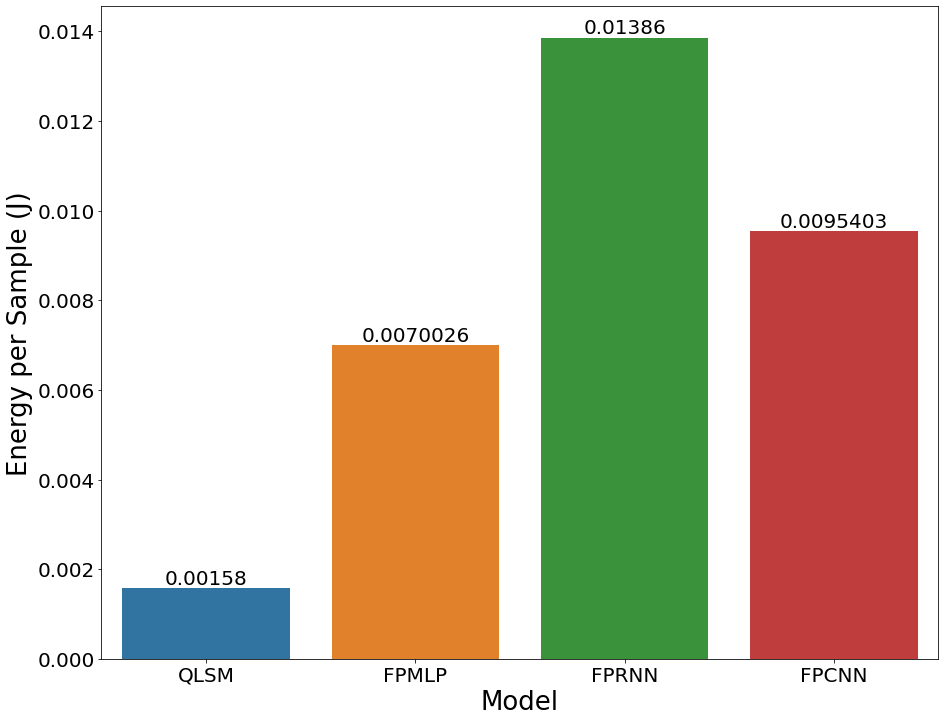

In [14]:
# power 
RNN = ['FPRNN', 55 * 0.000252]
CNN = ['FPCNN', 55 * 0.00017346]
MLP = ['FPMLP', 55 * 0.00012732]
LSM = ['QLSM', 0.00158]

plt.figure(figsize=(15,12))
plt.rcParams["font.family"] = "Times New Roman"
df = pd.DataFrame([LSM, MLP, RNN, CNN], columns=['Model', 'Energy'])
ax = sns.barplot(data=df, x='Model', y='Energy')
for container in ax.containers:
    ax.bar_label(container, fontsize=20)

plt.xlabel('Model', fontsize=26);
plt.ylabel('Energy per Sample (J)', fontsize=26);
#plt.title('Energy Consumption per Sample for Different Models', fontsize=30, weight='bold')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.savefig('energy.png', bbox_inches='tight')

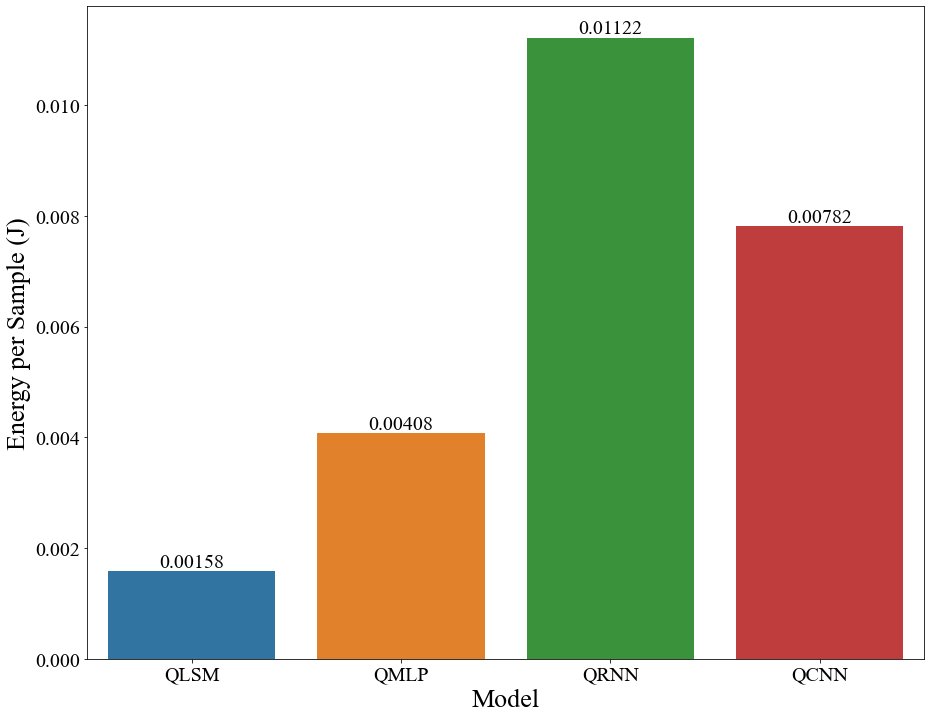

In [9]:
# quantized power 
RNN = ['QRNN', 34 * 0.33 / 1000]
CNN = ['QCNN', 34 * 0.23 / 1000]
MLP = ['QMLP', 34 * 0.12 / 1000]
LSM = ['QLSM', 0.00158]

plt.figure(figsize=(15,12))
plt.rcParams["font.family"] = "Times New Roman"
df = pd.DataFrame([LSM, MLP, RNN, CNN], columns=['Model', 'Energy'])
ax = sns.barplot(data=df, x='Model', y='Energy')
for container in ax.containers:
    ax.bar_label(container, fontsize=20)

plt.xlabel('Model', fontsize=26);
plt.ylabel('Energy per Sample (J)', fontsize=26);
#plt.title('Energy Consumption per Sample for Different Models', fontsize=30, weight='bold')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.savefig('TSUSC_energy.png', bbox_inches='tight')

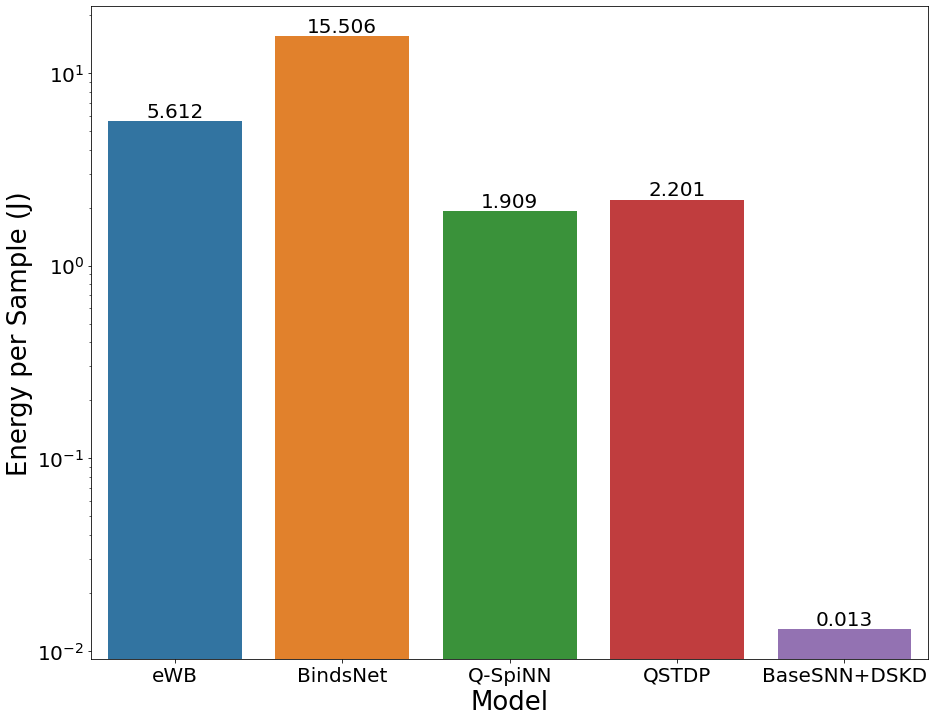

In [8]:
# power batch = 1
eWB = ['eWB', 5.612]
bindsnet = ['BindsNet', 15.506]
q_spi = ['Q-SpiNN', 1.909]
QSTDP = ['QSTDP', 2.201]
BaseSNN_DSKD = ['BaseSNN+DSKD', 0.013]

plt.figure(figsize=(15,12))
plt.rcParams["font.family"] = "Times New Roman"
df = pd.DataFrame([eWB, bindsnet, q_spi, QSTDP, BaseSNN_DSKD], columns=['Model', 'Energy'])
ax = sns.barplot(data=df, x='Model', y='Energy')
ax.set(yscale="log")
for container in ax.containers:
    ax.bar_label(container, fontsize=20)

plt.xlabel('Model', fontsize=26);
plt.ylabel('Energy per Sample (J)', fontsize=26);
#plt.title('Energy Consumption per Sample for Different Models', fontsize=30, weight='bold')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.savefig('energy1.png', bbox_inches='tight')

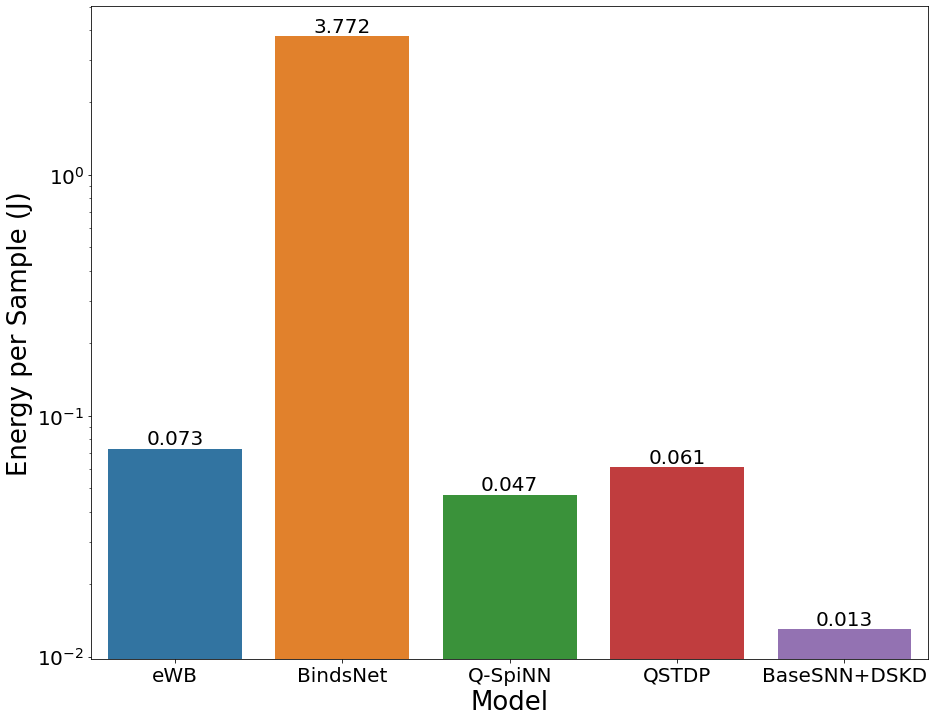

In [11]:
# power batch = 128
eWB = ['eWB', 0.073]
bindsnet = ['BindsNet', 3.772]
q_spi = ['Q-SpiNN', 0.047]
QSTDP = ['QSTDP', 0.061]
BaseSNN_DSKD = ['BaseSNN+DSKD', 0.013]

plt.figure(figsize=(15,12))
plt.rcParams["font.family"] = "Times New Roman"
df = pd.DataFrame([eWB, bindsnet, q_spi, QSTDP, BaseSNN_DSKD], columns=['Model', 'Energy'])
ax = sns.barplot(data=df, x='Model', y='Energy')
ax.set(yscale="log")
for container in ax.containers:
    ax.bar_label(container, fontsize=20)

plt.xlabel('Model', fontsize=26);
plt.ylabel('Energy per Sample (J)', fontsize=26);
#plt.title('Energy Consumption per Sample for Different Models', fontsize=30, weight='bold')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.savefig('energy128.png', bbox_inches='tight')